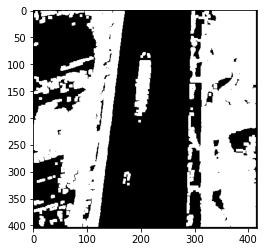

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from numpy import asarray
import cv2

# Read image
img = Image.open('Suez Canal.png')
imgGray = img.convert('L')
imggraynumpy = asarray(imgGray)

def dialation(grayImage,kernal):
 data = asarray(grayImage)
 thresh = 128
 img_binary = cv2.threshold(data, thresh, 255, cv2.THRESH_BINARY)[1]

 kernala=np.ones([kernal,kernal])*255
 s=img_binary.shape
 col=s[1]
 row=s[0]
 if kernal % 2 != 0 :
    mid=(kernal+1)//2
    endd=mid-1
 resa=np.zeros((row,col))

 for i in range(mid , row-mid) :
  for j in range (mid , col-mid) :
    if img_binary[i][j]==255 :
      resa[i-1-endd:i+endd,j-1-endd:j+endd]=kernala
 return resa
 
x=dialation(imgGray,5)
plt.imshow(x,"gray")

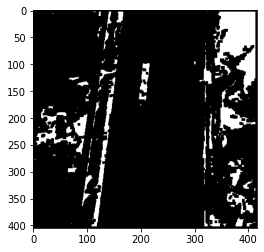

In [4]:
def erosion(grayImage,kernal):
 data = asarray(grayImage)
 thresh = 128
 img_binary = cv2.threshold(data, thresh, 255, cv2.THRESH_BINARY)[1]

 kernala=np.ones([kernal,kernal])*255
 s=img_binary.shape
 col=s[1]
 row=s[0]
 if kernal % 2 != 0 :
    mid=(kernal+1)//2
    endd=mid-1
 resa=np.zeros((row,col))

 for i in range(mid , row-mid) :
  for j in range (mid , col-mid) :
    if img_binary[i][j]==255 :
         if np.array_equal(img_binary[i-1-endd:i+endd,j-1-endd:j+endd] , kernala):
            resa[i,j]=255;         
     
 return resa
x=erosion(imgGray,5)
plt.imshow(x,"gray") 

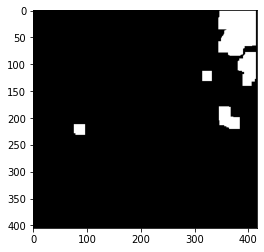

In [5]:
def opening(img,kernel):
 x =kernel
 erA=erosion(img,x)
 resO=dialation(erA,x)
 return resO

x=opening(imgGray,17)
plt.imshow(x,"gray") 

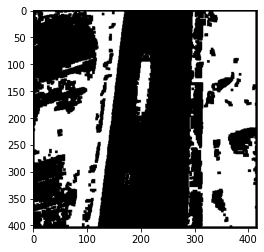

In [6]:
def closing(img,kernel):

 x =kernel 
 dil=dialation(img,x)
 reso=erosion(dil,x)
 return reso

x=closing(imgGray,5)
plt.imshow(x,"gray") 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


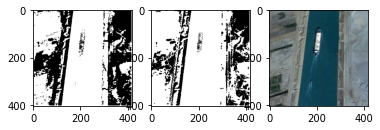

In [121]:
import cv2
import copy

#cv2.cvtColor(opening(grayImage,s),cv2.COLOR_GRAY2RGB))

def incContrast(grayImage,img,s,a,b):
    dataImg=asarray(img)
    dataGray=asarray(grayImage)

    partTopHatRGB=np.zeros((405, 417, 3))
    partBotHatRGB=np.zeros((405, 417, 3))
    #partTopHatRGB=copy.copy(dataImg)
    #partBotHatRGB=copy.copy(dataImg)
    
    partAop=opening(grayImage,s)
    partBcl=closing(grayImage,s)


    partTopHat=a*(dataGray-partAop)
    partTopHatRGB[:,:,0]=partTopHat
    partTopHatRGB[:,:,1]=partTopHat
    partTopHatRGB[:,:,2]=partTopHat


    partBotHat=b*(partBcl-dataGray)
    partBotHatRGB[:,:,0]=partBotHat
    partBotHatRGB[:,:,1]=partBotHat
    partBotHatRGB[:,:,2]=partBotHat


    Res=dataImg+partTopHatRGB-partBotHatRGB
    return Res
x=incContrast(imgGray,img,3,1,5)
y=incContrast(imgGray,img,3,5,1)


f, axarr = plt.subplots(1,3)
axarr[0].imshow(x)
axarr[1].imshow(y)
axarr[2].imshow(img)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


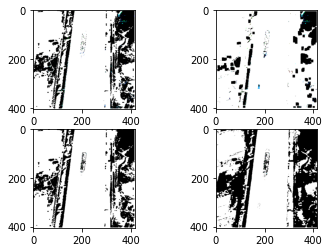

In [122]:
a=incContrast(imgGray,img,3,1,1)
b=incContrast(imgGray,img,9,1,1)
c=incContrast(imgGray,img,3,5,1)
d=incContrast(imgGray,img,3,1,5)
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(a)
axarr[0,1].imshow(b)
axarr[1,0].imshow(c)
axarr[1,1].imshow(d)
